In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from qs_opinf.constants import results_path

# import pandas as pd
from scipy.io import loadmat, savemat


In [2]:
PATH3 = str(results_path / "Burgers_Dirichilet/GlobalStability") + '/'


Data3 = loadmat(PATH3 + '-1' + '/' + f"simulation_error_order_20.mat")
Data3['errors_test']


array([[0.03716404, 0.02207686, 0.02699613]])

In [3]:
for i in np.linspace(-10,1,12):
    print(int(i))

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1


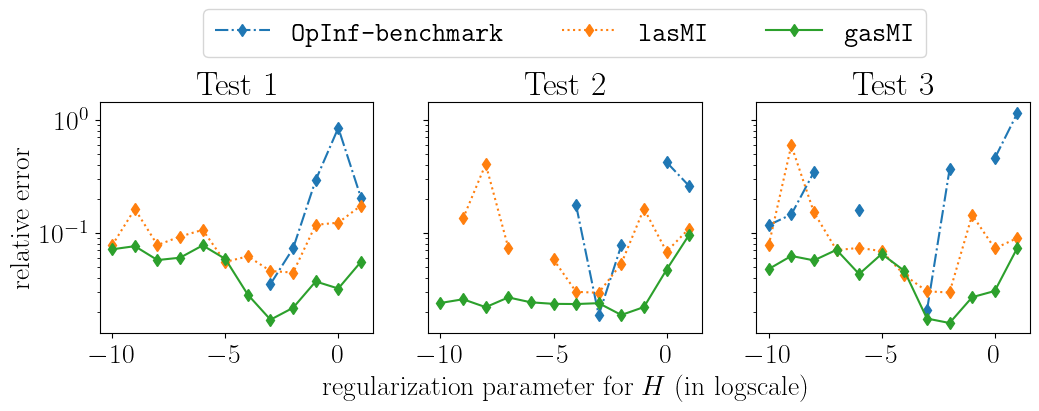

In [4]:
font = {"family": "normal", "weight": "bold", "size": 20}

matplotlib.rc("font", **font)
plt.rcParams["text.usetex"] = True

PATH1 = str(results_path / "Burgers_Dirichilet/NoStability") + '/'
PATH2 = str(results_path / "Burgers_Dirichilet/LocalStability") + '/' 
PATH3 = str(results_path / "Burgers_Dirichilet/GlobalStability") + '/'


LABELS = [r"\texttt{OpInf-benchmark}", r"\texttt{lasMI}", r"\texttt{gasMI}"]
MARKERS = ["d", "s", "o"]
Err1 = []
Err2 = []
Err3 = []

# Data1 = loadmat(PATH1 + f"simulation_error_order_20.mat")
# reduced_orders = Data1["reduced_orders"].reshape(
#     -1,
# )

r = 20
log_tols = np.linspace(-10,1,12)
for i in log_tols:
    Data1 = loadmat(PATH1 + str(int(i)) + '/'+ f"simulation_error_order_{r}.mat")
    Err1.append(Data1["errors_test"])

    Data2 = loadmat(PATH2 + str(int(i)) + '/'+ f"simulation_error_order_{r}.mat")
    Err2.append(Data2["errors_test"])

    Data3 = loadmat(PATH3 + str(int(i)) + '/'+ f"simulation_error_order_{r}.mat")
    Err3.append(Data3["errors_test"])

Err1 = np.array(Err1)
Err2 = np.array(Err2)
Err3 = np.array(Err3)

fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey = True)

for i in range(3):
    ax[i].semilogy(log_tols, Err1[:,0,i], linestyle="-.", marker=MARKERS[0], label=LABELS[0])
    ax[i].semilogy(log_tols, Err2[:,0,i], linestyle=":", marker=MARKERS[0], label=LABELS[1])
    ax[i].semilogy(log_tols, Err3[:,0,i], linestyle="-", marker=MARKERS[0], label=LABELS[2])
    ax[i].set(title = f'Test {i+1}')

ax[0].set(ylabel="relative error")
ax[1].set(xlabel="regularization parameter for $H$ (in logscale)")
ax[1].legend(loc="center", bbox_to_anchor=(0.5, 1.3), ncol=3, fancybox=True, shadow=False)



# ax.semilogy(
#     reduced_orders,
#     np.array(Err2).reshape(
#         -1,
#     ),
#     linestyle="--",
#     marker=MARKERS[1],
#     label=LABELS[1],
# )
# ax.semilogy(
#     reduced_orders,
#     np.array(Err3).reshape(
#         -1,
#     ),
#     linestyle="-.",
#     marker=MARKERS[2],
#     label=LABELS[2],
# )
# ax.set(xlabel="reduced order", ylabel="mean relative error")

# ax.legend(loc="center", bbox_to_anchor=(0.5, 1.25), ncol=2, fancybox=True, shadow=False)
# plt.tight_layout()
fig.savefig(PATH1 + "../" + f"compare_simulations.pdf", bbox_inches="tight")
fig.savefig(PATH1 + "../" + f"compare_simulations.png", dpi=300, bbox_inches="tight")


In [5]:
for tol, err in zip(log_tols,Err1.reshape(12,3)):
    print(tol, err)

-10.0 [       nan        nan 0.11706431]
-9.0 [       nan        nan 0.14525908]
-8.0 [       nan        nan 0.34449476]
-7.0 [nan nan nan]
-6.0 [       nan        nan 0.15956061]
-5.0 [nan nan nan]
-4.0 [       nan 0.17504798        nan]
-3.0 [0.03529273 0.01871517 0.02058983]
-2.0 [0.07292969 0.07771655 0.36346495]
-1.0 [0.29251437        nan        nan]
0.0 [0.84648009 0.42124104 0.45526511]
1.0 [0.20520319 0.25944383 1.14573183]


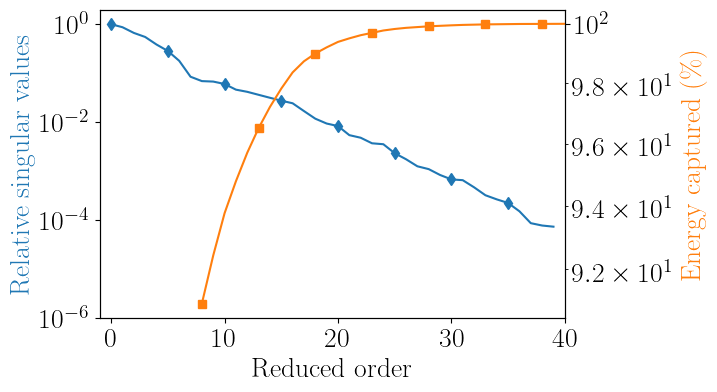

In [7]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
i = -3
sing_vals = loadmat(PATH2 + str(int(i)) + '/' + f"simulation_error_order_20.mat")["sin_vals"].reshape(-1, 1)
rsing_vals = sing_vals / sing_vals[0]
orders = np.arange(len(rsing_vals))

energy_cap = np.zeros_like(sing_vals)
energy_cap[0] = rsing_vals[0]

for i in range(1, len(energy_cap)):
    energy_cap[i] = energy_cap[i - 1] + rsing_vals[i]


fig, ax = plt.subplots(figsize=(6, 4))
ax.semilogy(orders[:40], rsing_vals[:40], color=colors[0], marker="d", markevery=5)
ax.set_xlabel("Reduced order")
ax.set_ylabel("Relative singular values", color=colors[0])

ax2 = ax.twinx()

ax2.semilogy(
    orders[8:],
    100 * energy_cap[8:] / sum(rsing_vals),
    color=colors[1],
    marker="s",
    markevery=5,
)
ax2.set_ylabel("Energy captured (\%)", color=colors[1])

ax.set_xlim([-1, 40])
ax.set_ylim([1e-6, 2e0])

fig.savefig(PATH1 + "../" + f"singular_value_decay.pdf", bbox_inches="tight")
fig.savefig(PATH1 + "../" + f"singular_value_decay.png", dpi=300, bbox_inches="tight")


In [8]:
energy_cap[14] / sum(rsing_vals)


array([0.97206454])